In [55]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

from tqdm import tqdm_notebook as tqdm

pd.set_option('display.max_rows', 9999)

# データ整形
2013年9月26日の1:100の株式分割を調整したデータを用いる

In [2]:
df = pd.read_csv("9501_2003.csv", encoding='cp932', header=1)
for i in range(16):
    year = i+2004
    temp = pd.read_csv(f"9501_{year}.csv", encoding='cp932', header=1)
    df = pd.concat((df,temp),axis=0)
df = df.reset_index(drop=True)

マーケット株価としてTOPIXを採用する。

In [3]:
topix = pd.read_csv("topix.csv").rename(columns={'終値': 'TOPIX終値', '日付': 'TOPIX日付'})

In [4]:
topix.head()

TOPIX日付       始値       高値       安値  TOPIX終値
0  2019/12/02  1705.99  1717.35  1705.23  1714.49
1  2019/11/29  1712.21  1712.83  1698.01  1699.36
2  2019/11/28  1712.02   1713.4  1703.54  1708.06
3  2019/11/27  1710.43   1714.6  1709.21  1710.98
4  2019/11/26  1712.61  1719.57  1705.04  1705.71

In [5]:
for i in range(len(topix)):
    if (i%22 == 20) or (i%22 == 21):
        topix.drop(i, inplace=True)
topix = topix[::-1].reset_index(drop=True)
topix_copy = topix.copy()
topix.drop([3380,3382,3647,4090], axis=0, inplace=True)
topix = topix.reset_index(drop=True)

無リスク資産として、日本国債（10年）を採用する

In [6]:
bond = pd.read_csv("bond.csv")
bond.drop([3380,3382,3647,4090], axis=0, inplace=True)
bond = bond.reset_index(drop=True)

In [7]:
bond.tail()

国債日付     金利
4137  2019/11/26 -0.092
4138  2019/11/27 -0.106
4139  2019/11/28 -0.086
4140  2019/11/29 -0.075
4141  2019/12/02 -0.046

In [8]:
date = pd.concat((df["日付"].str.replace('-',''),topix["TOPIX日付"].str.replace('/','')),axis=1)
date.fillna(0,inplace=True)
date = date.astype(int)
for i in range(len(date)):
    if date.loc[i,"日付"]!=date.loc[i,"TOPIX日付"]:
        print(i)

In [9]:
#date.loc[4087-1:4087+5]

In [10]:
#topix_copy[4087-1:4087+5]

In [11]:
df.shape, topix.shape, bond.shape

((4142, 7), (4142, 5), (4142, 2))

In [12]:
df = pd.concat((df,topix["TOPIX終値"].astype(float)),axis=1)
df = pd.concat((df,bond["金利"].astype(float)),axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4142 entries, 0 to 4141
Data columns (total 9 columns):
日付         4142 non-null object
始値         4142 non-null int64
高値         4142 non-null int64
安値         4142 non-null int64
終値         4142 non-null int64
出来高        4142 non-null int64
終値調整値      4142 non-null int64
TOPIX終値    4142 non-null float64
金利         4142 non-null float64
dtypes: float64(2), int64(6), object(1)
memory usage: 291.3+ KB


In [14]:
df["日足収益率"] = df["終値調整値"].diff()
df["TOPIX日足利益率"] = df["TOPIX終値"].diff()
df["日足収益率"][:-1] = df["日足収益率"][1:]
df["TOPIX日足利益率"][:-1] = df["TOPIX日足利益率"][1:]
df["日足収益率"] = df["日足収益率"]/df["終値調整値"]
df["TOPIX日足利益率"] = df["TOPIX日足利益率"]/df["TOPIX終値"]
df["日足収益率"][1:] = df["日足収益率"][:-1]
df["TOPIX日足利益率"][1:] = df["TOPIX日足利益率"][:-1]
df["日足収益率"][0:1]=np.nan
df["TOPIX日足利益率"][0:1]=np.nan

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda/lib/python3.6/site-packa

In [15]:
df["週足収益率"] = df["終値調整値"].diff(7)
df["TOPIX週足利益率"] = df["TOPIX終値"].diff(7)
df["週足収益率"][:-7] = df["週足収益率"][7:]
df["TOPIX週足利益率"][:-7] = df["TOPIX週足利益率"][7:]
df["週足収益率"] = df["週足収益率"]/df["終値調整値"]
df["TOPIX週足利益率"] = df["TOPIX週足利益率"]/df["TOPIX終値"]
df["週足収益率"][7:] = df["週足収益率"][:-7]
df["TOPIX週足利益率"][7:] = df["TOPIX週足利益率"][:-7]
df["週足収益率"][0:7]=np.nan
df["TOPIX週足利益率"][0:7]=np.nan

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda/lib/python3.6/site-packa

In [16]:
df["月間収益率"] = df["終値調整値"].diff(30)
df["TOPIX月間利益率"] = df["TOPIX終値"].diff(30)
df["月間収益率"][:-30] = df["月間収益率"][30:]
df["TOPIX月間利益率"][:-30] = df["TOPIX月間利益率"][30:]
df["月間収益率"] = df["月間収益率"]/df["終値調整値"]
df["TOPIX月間利益率"] = df["TOPIX月間利益率"]/df["TOPIX終値"]
df["月間収益率"][30:] = df["月間収益率"][:-30]
df["TOPIX月間利益率"][30:] = df["TOPIX月間利益率"][:-30]
df["月間収益率"][0:30]=np.nan
df["TOPIX月間利益率"][0:30]=np.nan

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda/lib/python3.6/site-packa

In [17]:
df.tail(8)

日付   始値   高値   安値   終値      出来高  終値調整値  TOPIX終値     金利  \
4134  2019-11-21  476  478  469  478  8948000    478  1689.38 -0.107   
4135  2019-11-22  475  478  467  468  8372500    468  1691.34 -0.077   
4136  2019-11-25  472  476  471  473  5270000    473  1702.96 -0.081   
4137  2019-11-26  477  480  473  474  8370000    474  1705.71 -0.092   
4138  2019-11-27  474  486  474  485  6916300    485  1710.98 -0.106   
4139  2019-11-28  487  489  480  482  5982300    482  1708.06 -0.086   
4140  2019-11-29  482  487  479  480  4885500    480  1699.36 -0.075   
4141  2019-12-02  480  487  479  483  5306700    483  1714.49 -0.046   

         日足収益率  TOPIX日足利益率     週足収益率  TOPIX週足利益率     月間収益率  TOPIX月間利益率  
4134 -0.002088   -0.001023 -0.049702   -0.011868 -0.106542    0.074157  
4135 -0.020921    0.001160 -0.046843   -0.005287 -0.130112    0.066083  
4136  0.010684    0.006870 -0.022727    0.011019 -0.120818    0.076664  
4137  0.002114    0.001615 -0.038540    0.005328 -0.122222    0.078594  
4138  0.023207    0.003090 -0.008180    0.006033 -0.091760    0.072533  
4139 -0.006186   -0.001707 -0.012295    0.006678 -0.107407    0.054228  
4140 -0.004149   -0.005093  0.002088    0.004878 -0.112754    0.041587  
4141  0.006250    0.008903  0.010460    0.014863 -0.092105    0.055616

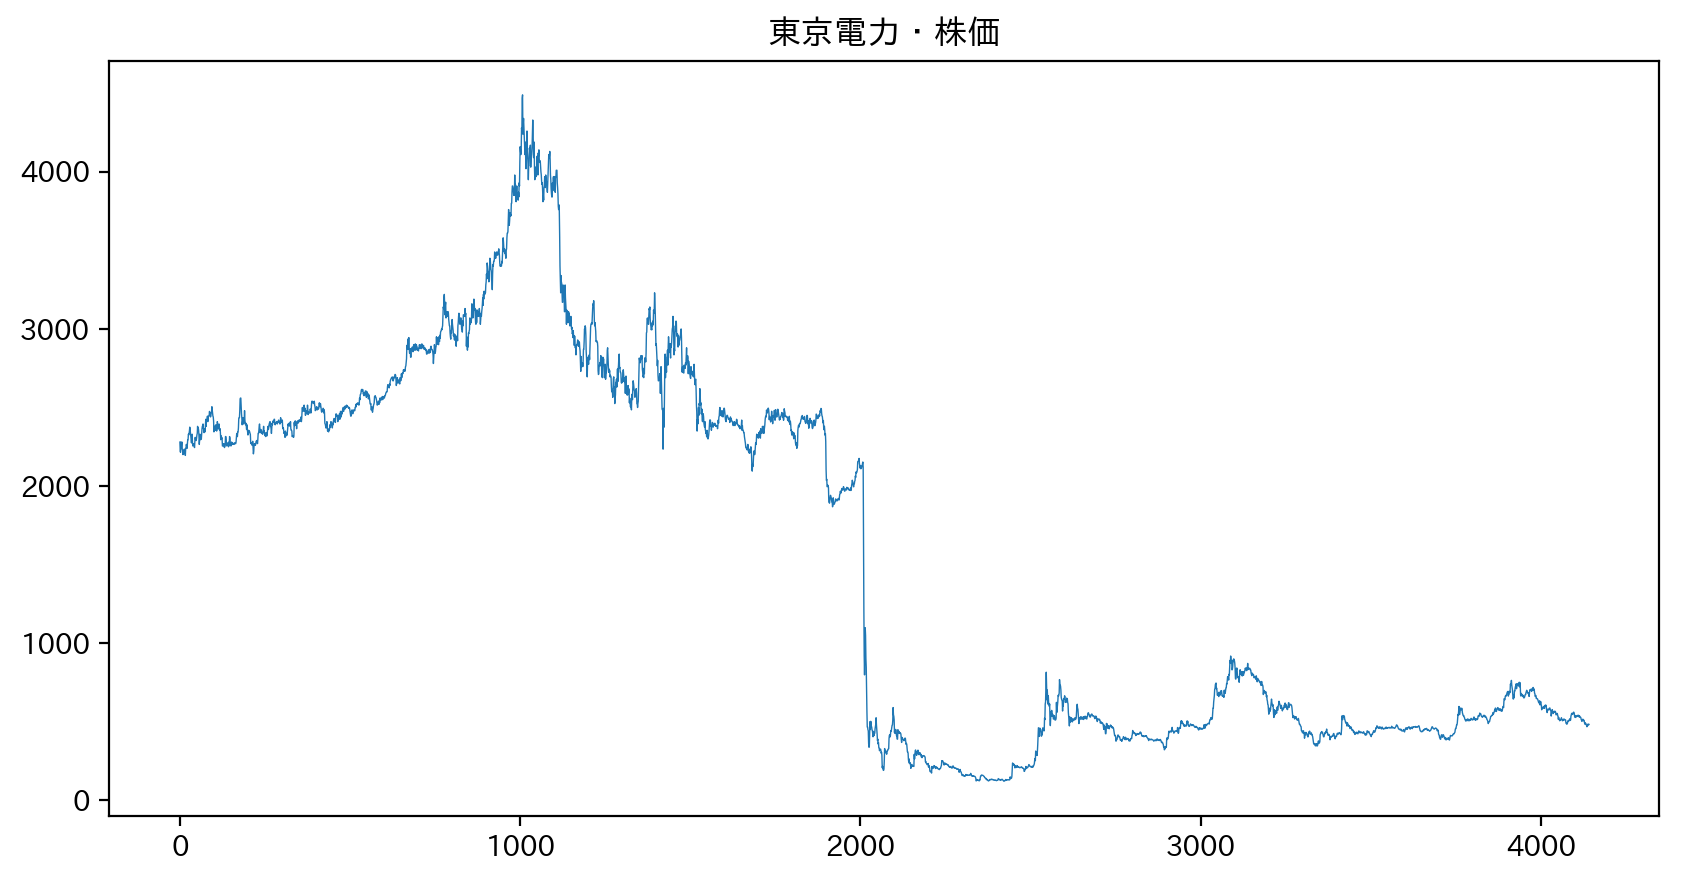

In [18]:
plt.figure(figsize=(10,5),dpi=200)
plt.title(f"東京電力・株価")
plt.plot(df["終値調整値"], linewidth=0.5)

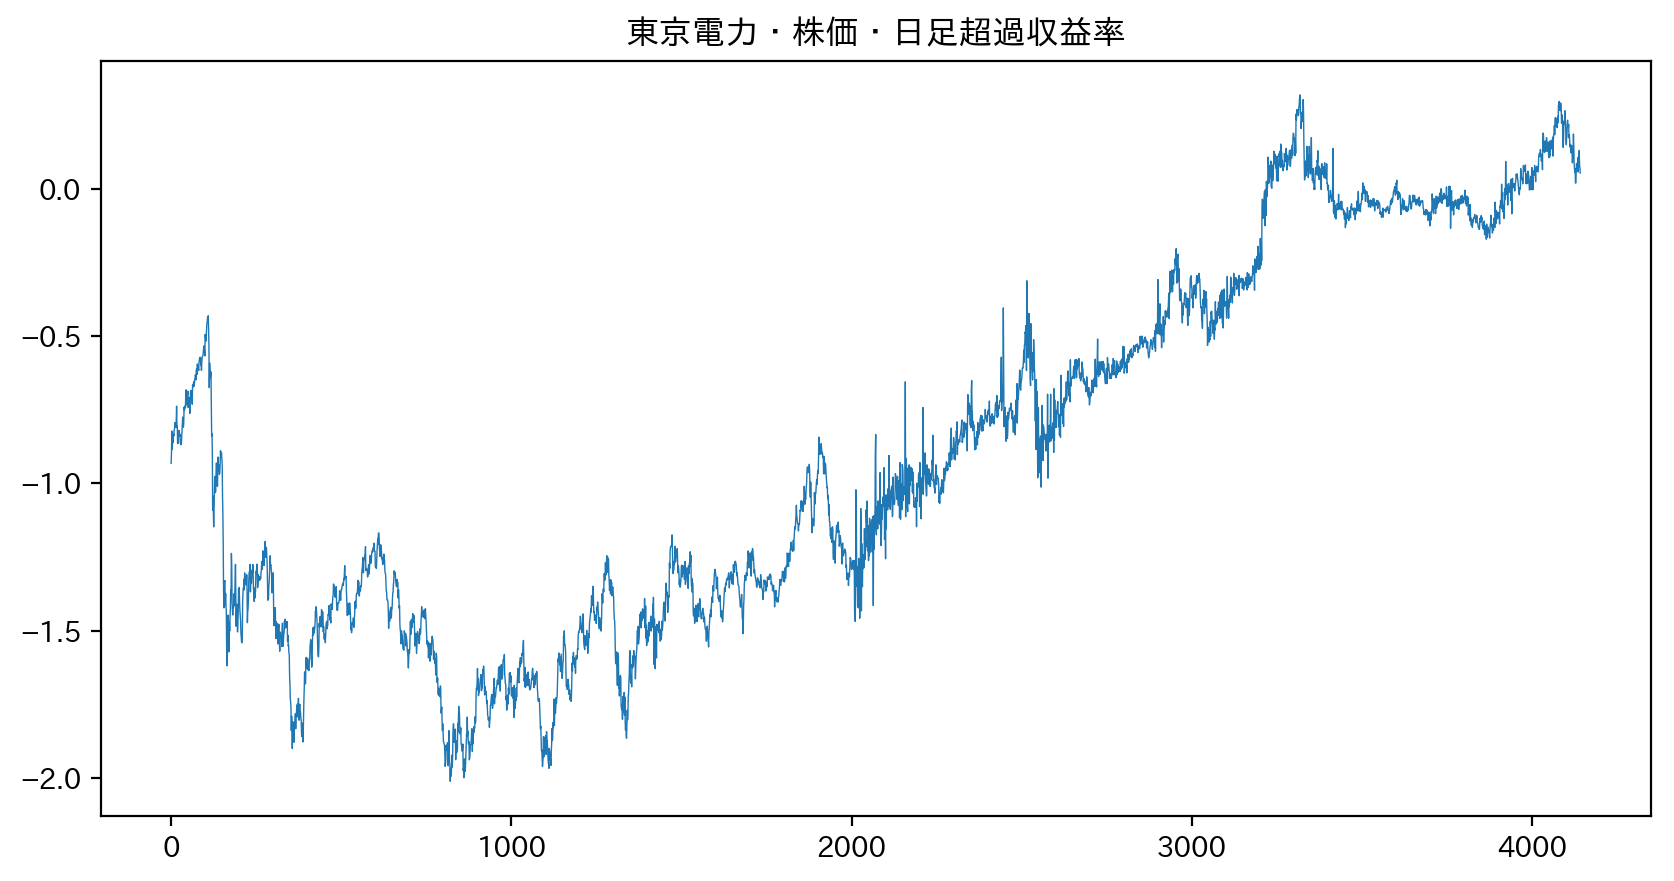

In [19]:
plt.figure(figsize=(10,5),dpi=200)
plt.title(f"東京電力・株価・日足超過収益率")
plt.plot(df["日足収益率"][1:]-df["金利"][1:], linewidth=0.5)

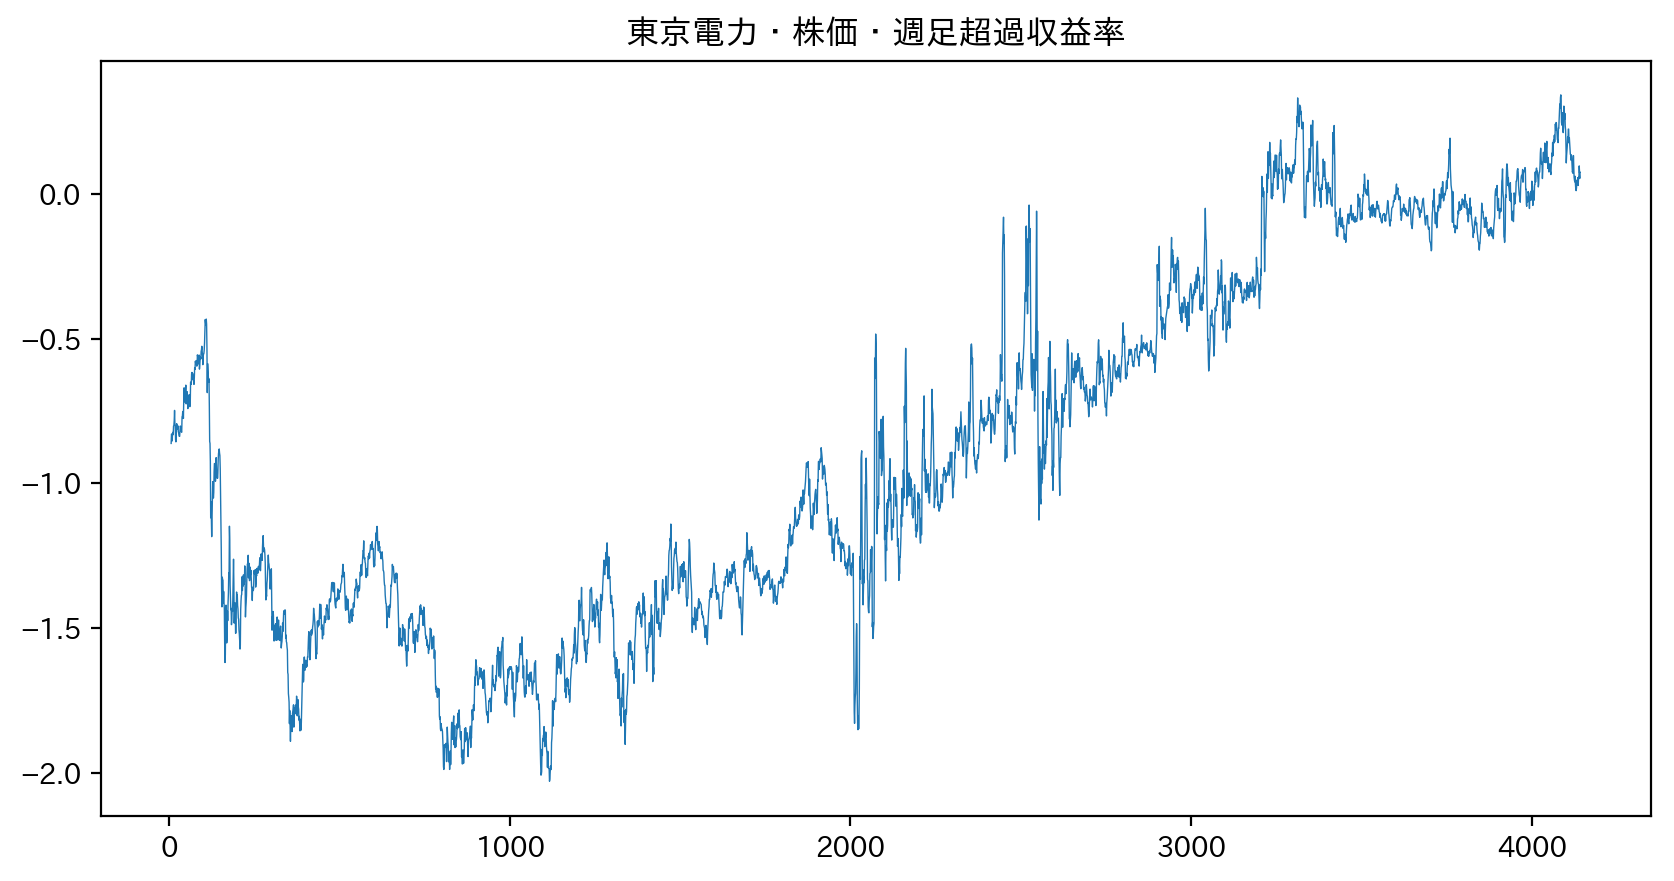

In [20]:
plt.figure(figsize=(10,5),dpi=200)
plt.title(f"東京電力・株価・週足超過収益率")
plt.plot(df["週足収益率"][7:]-df["金利"][7:], linewidth=0.5)

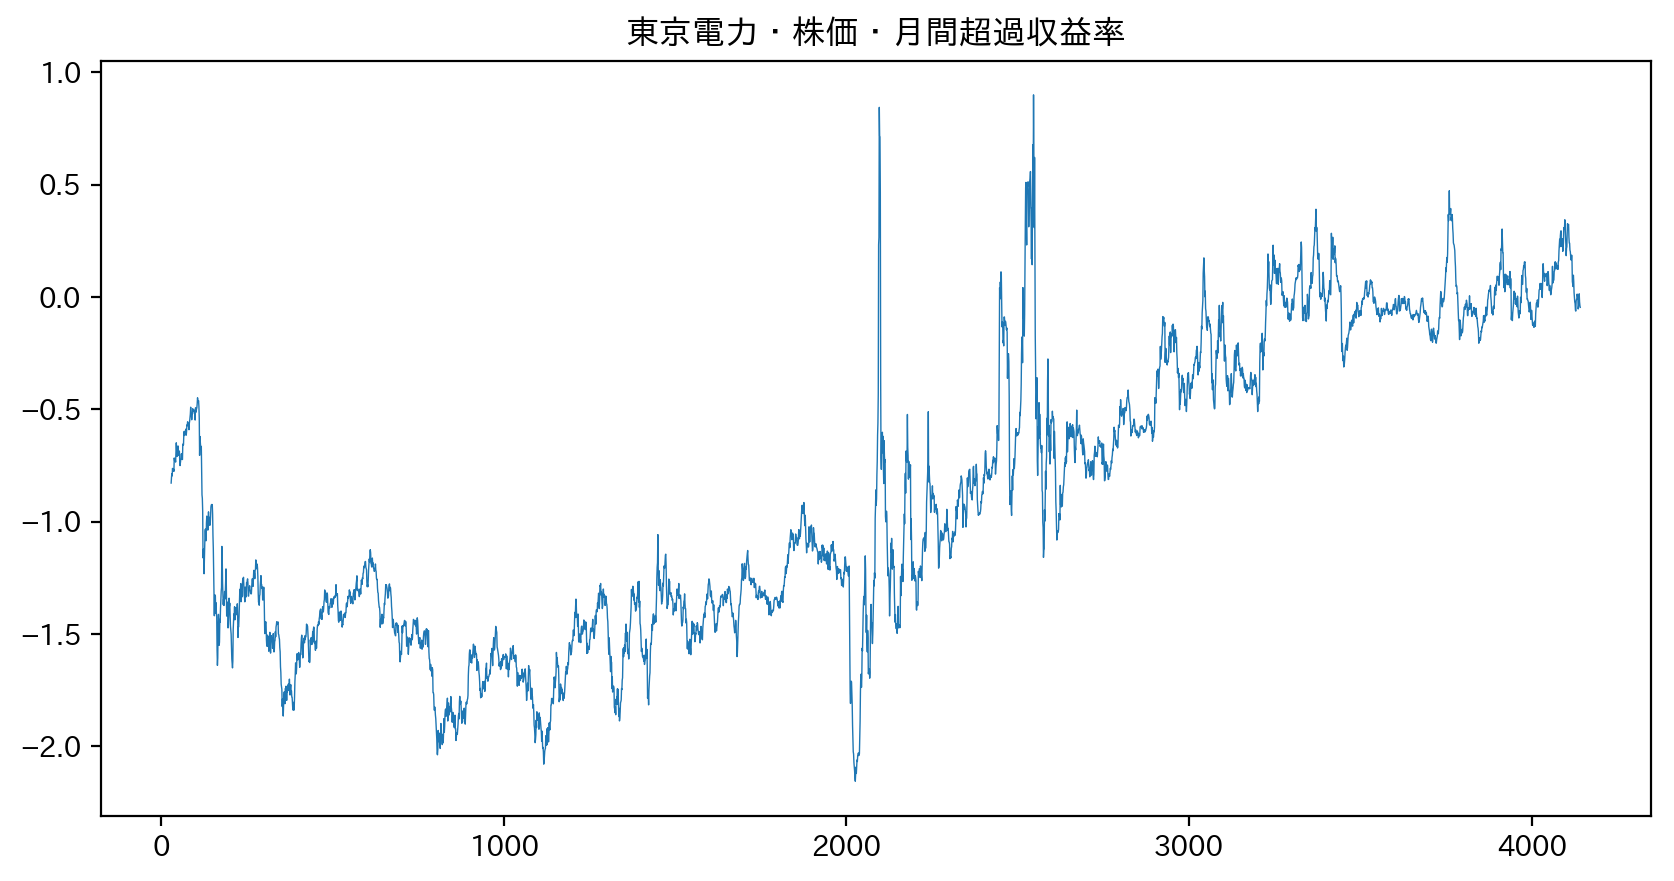

In [21]:
plt.figure(figsize=(10,5),dpi=200)
plt.title(f"東京電力・株価・月間超過収益率")
plt.plot(df["月間収益率"][30:]-df["金利"][30:], linewidth=0.5)

In [22]:
x = df["月間収益率"][30:]-df["金利"][30:]
length = len(x)

In [23]:
x.shape

(4112,)

In [24]:
x.mean()

-0.878935369191577

In [25]:
x.std()

0.6588274350689143

# MCMC

In [26]:
epsilon = 0.1
# 
trial = 25000
# trial: how many times do mcmc

In [27]:
theta = [-1.4,-0.25,0.05,0.125,3,3,0,0]
theta[6] = np.exp(theta[4])/(1+np.exp(theta[4]))
theta[7] = np.exp(theta[5])/(1+np.exp(theta[5]))
# theta[0] = mu1
# theta[1] = mu2
# theta[2] = sigma1
# theta[3] = sigma2
# theta[4] = p0
# theta[5] = q0
# theta[6] = p
# theta[7] = q

num_val = len(theta)

対数尤度を計算する関数

In [28]:
def cal_logL(x, theta):
    likelihood1 = stats.norm.pdf(x=x, loc=theta[0], scale=np.sqrt(theta[2]))
    likelihood2 = stats.norm.pdf(x=x, loc=theta[1], scale=np.sqrt(theta[3]))
    
    prior1=(1-theta[7])/(2-theta[6]-theta[7])
    prior2=(1-theta[6])/(2-theta[6]-theta[7])
    
    logL = 0
    for i in range(length):
        temp1 = likelihood1[i]*prior1
        temp2 = likelihood2[i]*prior2

        posterior1 = temp1/(temp1+temp2)
        posterior2 = temp2/(temp1+temp2)

        logL += np.log(temp1+temp2)
        
        prior1 = theta[6]*posterior1 + (1-theta[7])*posterior2
        prior2 = (1-theta[6])*posterior1 + theta[7]*posterior2
        
    return logL

各レジームである確率の配列を返す関数

In [29]:
def prob_regime(x, theta):
    likelihood1 = stats.norm.pdf(x=x, loc=theta[0], scale=np.sqrt(theta[2]))
    likelihood2 = stats.norm.pdf(x=x, loc=theta[1], scale=np.sqrt(theta[3]))
    
    prior1=(1-theta[7])/(2-theta[6]-theta[7])
    prior2=(1-theta[6])/(2-theta[6]-theta[7])
    
    prob_list1 = []
    prob_list2 = []
    for i in range(length):
        temp1 = likelihood1[i]*prior1
        temp2 = likelihood2[i]*prior2

        prob_list1.append(temp1/(temp1+temp2))
        prob_list2.append(temp2/(temp1+temp2))
        
        posterior1 = temp1/(temp1+temp2)
        posterior2 = temp2/(temp1+temp2)
        
        prior1 = theta[6]*posterior1 + (1-theta[7])*posterior2
        prior2 = (1-theta[6])*posterior1 + theta[7]*posterior2
    
    return prob_list1, prob_list2

$\theta$を更新する関数。  
レジーム1よりレジーム2のボラティリティが大きいことを条件としている。

In [30]:
def create_next_theta(theta, epsilon):
    new_theta = theta.copy()
    new_theta[0:6] += (2*np.random.rand(6)-1)*epsilon
    new_theta[2:4] = np.exp(np.log(theta[2:4]) + (2*np.random.rand(2)-1)*epsilon*0.1)
    
    if new_theta[2]>new_theta[3]:
        new_theta[3] = theta[3]
        new_theta[2] = theta[2]

    new_theta[6] = np.exp(new_theta[4])/(1+np.exp(new_theta[4]))
    new_theta[7] = np.exp(new_theta[5])/(1+np.exp(new_theta[5]))
    
    return list(new_theta)

MCMCを実行する関数

In [31]:
def mcmc(x, theta, trial):
    # x: time_series
    # theta: parameter
    # trial: how many times do mcmc
    
    theta_list = []
    logL_list = []
    theta_list.append(theta)
    
    for i in tqdm(range(trial)):
        next_theta = create_next_theta(theta, epsilon)
        
        logL = cal_logL(x, theta)
        next_logL = cal_logL(x, next_theta)
        
        ratio = np.exp(next_logL-logL)
        logL_list.append(logL)

        if ratio > 1:
            theta = next_theta

        elif ratio > np.random.rand():
            theta = next_theta

        theta_list.append(theta)
        
        #if np.abs(np.log(ratio)) < 10**(-8):
            #return theta_list
        
        #if (i <120) & (i%4==0):
        if (False):
            prob1, prob2 = prob_regime(x, theta)
            regime = np.array(prob2)>=0.5
            regime = regime.astype(int)

            fig = plt.figure(figsize=(10,5),dpi=200)
            ax1 = fig.add_subplot(111)
            ln1=ax1.plot(range(length), x, linewidth=0.7, color="black", label="data")

            ax2 = ax1.twinx()
            ln2=ax2.bar(range(length), 1-np.array(regime), width=1.0, color="blue", alpha=0.4, label=r"$P(I(t) = 1)$")
            ln2=ax2.bar(range(length), regime, width=1.0, color="red", alpha=0.4, label=r"$P(I(t) = 2)$")

            h1, l1 = ax1.get_legend_handles_labels()
            h2, l2 = ax2.get_legend_handles_labels()
            ax1.legend(h1+h2, l1+l2, bbox_to_anchor=(1.05, 1), loc='upper left', edgecolor="gray", fancybox=False)

            ax1.set_xlabel('t')
            ax1.set_ylabel(r'data')
            ax2.set_ylabel(r'$P(I(t) = 2)$')
            ax1.set_title(f"Estimated Regime, epsilon={epsilon}, trial={i}/{trial}")
            plt.savefig(f'regime_estimating_{i}.png')
            
        if i%100==0:
            print(logL)
    
    return theta_list, logL_list

### 実行

In [32]:
theta_list, logL_list = mcmc(x, theta, trial)

-1009.8467293825476
-952.698499761755
-933.2718445728967
-918.2759365972914
-915.6547978281211
-903.5148605315994
-905.114632471517
-905.114632471517
-899.2703142770156
-893.7977964517246
-887.7665599760187
-874.6711264497201
-872.2248281741499
-869.1395363767363
-868.9490525167328
-858.6310876075931
-861.3946016184161
-858.4330959499965
-846.0355535382108
-846.0355535382108
-846.0355535382108
-846.0355535382108
-846.0355535382108
-846.0355535382108
-846.0355535382108
-844.327349526118
-840.1902917929568
-836.3459755714472
-836.3459755714472
-834.9646053105427
-833.2439688345868
-829.837441877339
-827.6804071371226
-828.5899658195416
-826.52879178967
-822.9336799551195
-820.3419938129817
-822.963127655835
-822.4847835432787
-823.8442174451127
-821.3947043143118
-818.5743066172378
-818.7308073389456
-817.4788261744218
-816.6687775774981
-816.6687775774981
-816.6687775774981
-817.0043049798387
-817.357569589953
-817.357569589953
-817.5826373418986
-818.5680907192733
-829.4932476087115
-8

In [33]:
theta_list = np.array(theta_list)

In [34]:
prob1, prob2 = prob_regime(x, theta_list[-1])

In [56]:
prob = pd.DataFrame(np.round(prob2,3))
prob.index = prob.index + 30
pd.concat((df,prob),axis=1)

日付    始値    高値    安値    終値        出来高  終値調整値  TOPIX終値     金利  \
0     2003-01-06  2270  2290  2270  2280    1309500   2280   860.07  0.911   
1     2003-01-07  2310  2310  2205  2220    3234900   2220   853.93  0.906   
2     2003-01-08  2225  2240  2210  2215    1547300   2215   839.55  0.892   
3     2003-01-09  2230  2280  2230  2280    2546200   2280   839.33  0.852   
4     2003-01-10  2280  2280  2230  2245    1834100   2245   837.70  0.870   
5     2003-01-14  2250  2275  2245  2270    1202800   2270   845.90  0.872   
6     2003-01-15  2275  2280  2255  2280    1699900   2280   855.66  0.849   
7     2003-01-16  2250  2265  2225  2230    1524600   2230   856.30  0.840   
8     2003-01-17  2235  2250  2230  2230    1414100   2230   859.25  0.834   
9     2003-01-20  2210  2250  2200  2200    1717500   2200   853.90  0.825   
10    2003-01-21  2225  2230  2205  2215    1320100   2215   863.64  0.825   
11    2003-01-22  2215  2215  2195  2205    1586800   2205   854.06  0.811   
12    2003-01-23  2210  2230  2205  2230    1745300   2230   865.43  0.806   
13    2003-01-24  2230  2250  2220  2235    1490200   2235   861.36  0.812   
14    2003-01-27  2225  2245  2215  2230    1093800   2230   850.03  0.802   
15    2003-01-28  2215  2230  2210  2210    1268800   2210   841.12  0.791   
16    2003-01-29  2220  2225  2190  2195    1443000   2195   825.72  0.781   
17    2003-01-30  2205  2245  2195  2240    2117900   2240   825.16  0.759   
18    2003-01-31  2250  2250  2220  2240    1892200   2240   821.18  0.810   
19    2003-02-03  2235  2270  2235  2265    1913700   2265   837.70  0.817   
20    2003-02-04  2250  2265  2250  2250    1601100   2250   844.26  0.856   
21    2003-02-05  2225  2265  2225  2240    1954600   2240   845.29  0.861   
22    2003-02-06  2255  2270  2240  2270    2139100   2270   839.95  0.857   
23    2003-02-07  2275  2310  2260  2295    2324100   2295   839.11  0.839   
24    2003-02-10  2285  2300  2285  2295    1229900   2295   842.69  0.821   
25    2003-02-12  2305  2330  2305  2330    2246200   2330   857.23  0.841   
26    2003-02-13  2320  2340  2310  2325    1350600   2325   853.01  0.838   
27    2003-02-14  2320  2355  2320  2335    2193300   2335   858.05  0.839   
28    2003-02-17  2350  2370  2330  2350    2126200   2350   861.70  0.870   
29    2003-02-18  2355  2390  2345  2375    2498800   2375   856.70  0.872   
30    2003-02-19  2375  2375  2335  2360    2213400   2360   853.59  0.863   
31    2003-02-20  2335  2345  2325  2340    1728000   2340   849.35  0.857   
32    2003-02-21  2345  2355  2310  2320    1330600   2320   840.11  0.833   
33    2003-02-24  2320  2325  2300  2305    1207700   2305   838.96  0.807   
34    2003-02-25  2280  2300  2265  2275    1692100   2275   819.18  0.776   
35    2003-02-26  2280  2315  2275  2310    2011800   2310   818.38  0.791   
36    2003-02-27  2325  2335  2315  2330    2317400   2330   819.20  0.791   
37    2003-02-28  2305  2320  2275  2275    1717100   2275   818.73  0.786   
38    2003-03-03  2265  2280  2255  2255    2364300   2255   825.63  0.787   
39    2003-03-04  2255  2280  2255  2270    1703500   2270   828.05  0.748   
40    2003-03-05  2255  2265  2255  2260    1294700   2260   822.81  0.748   
41    2003-03-06  2275  2280  2265  2265    1375500   2265   816.22  0.747   
42    2003-03-07  2275  2285  2255  2255    1864100   2255   796.17  0.733   
43    2003-03-10  2260  2270  2235  2245    1685000   2245   784.52  0.739   
44    2003-03-11  2240  2290  2240  2285    2164800   2285   770.62  0.714   
45    2003-03-12  2290  2325  2280  2310    2069100   2310   782.36  0.694   
46    2003-03-13  2315  2325  2295  2295    1351600   2295   778.52  0.724   
47    2003-03-14  2320  2325  2290  2290    3529900   2290   786.06  0.732   
48    2003-03-17  2310  2315  2275  2290    1900500   2290   777.21  0.718   
49    2003-03-18  2310  2330  2300  2305    2050600   2305   783.56  0.707   
50    2003-03-19  2315  2325  2285  

### 可視化

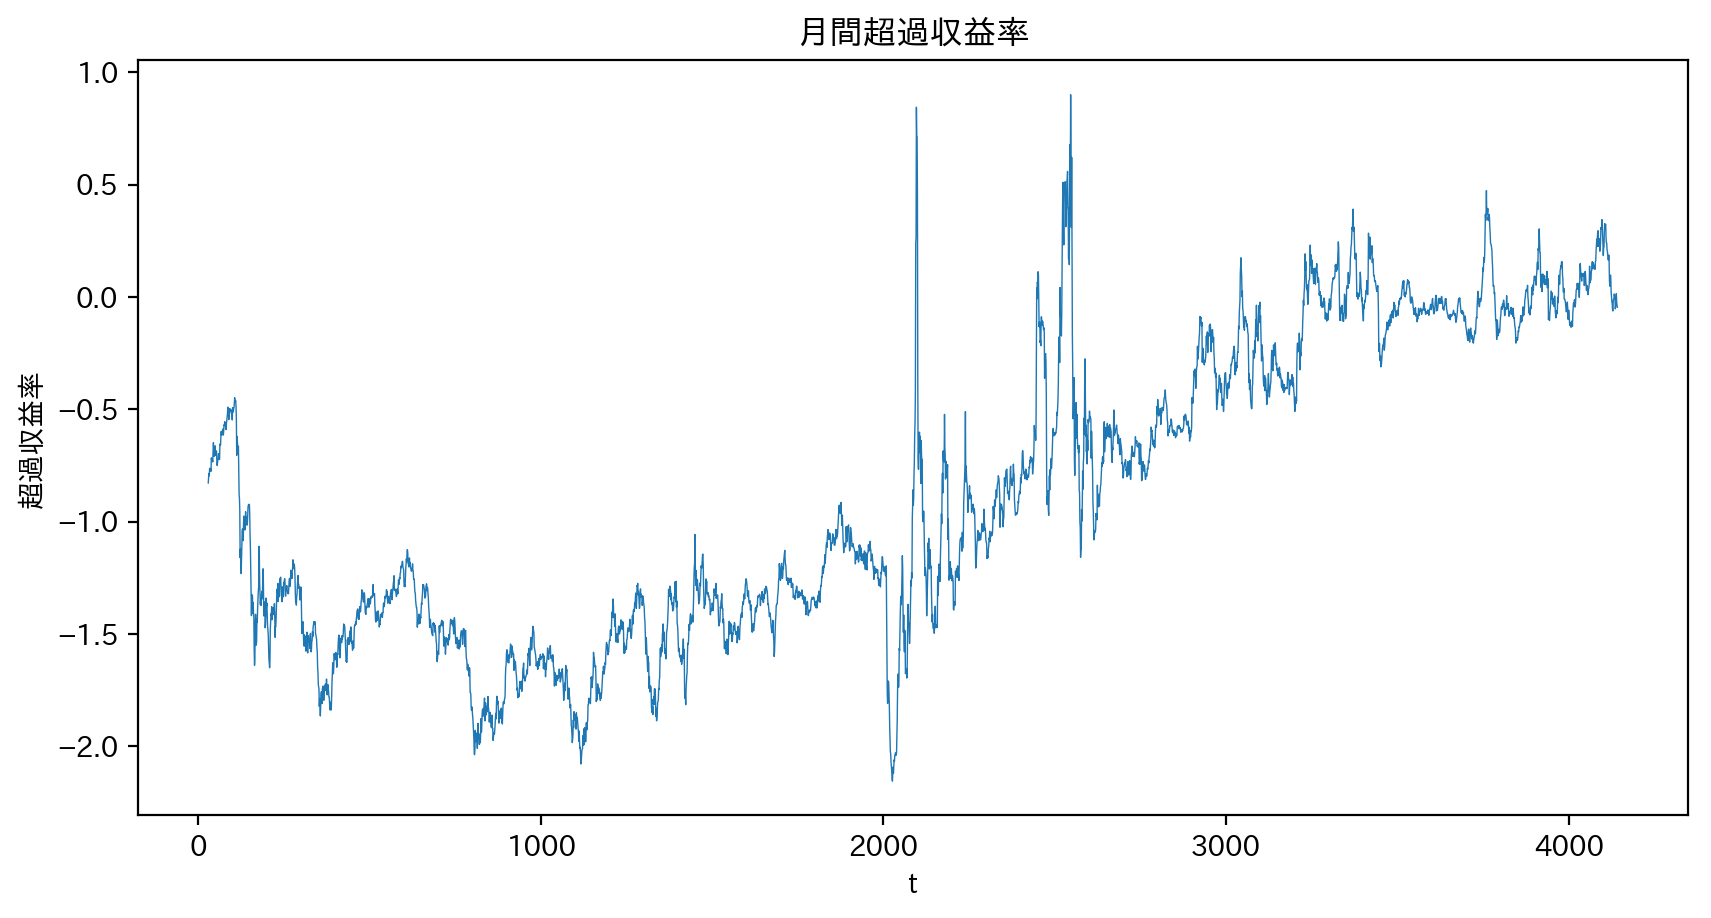

In [44]:
plt.figure(figsize=(10,5),dpi=200)
plt.title(f"月間超過収益率")
plt.plot(x, linewidth=0.5, label="東京電力")
plt.xlabel('t')
plt.ylabel(r'超過収益率')
plt.savefig("excess_return_series.png")

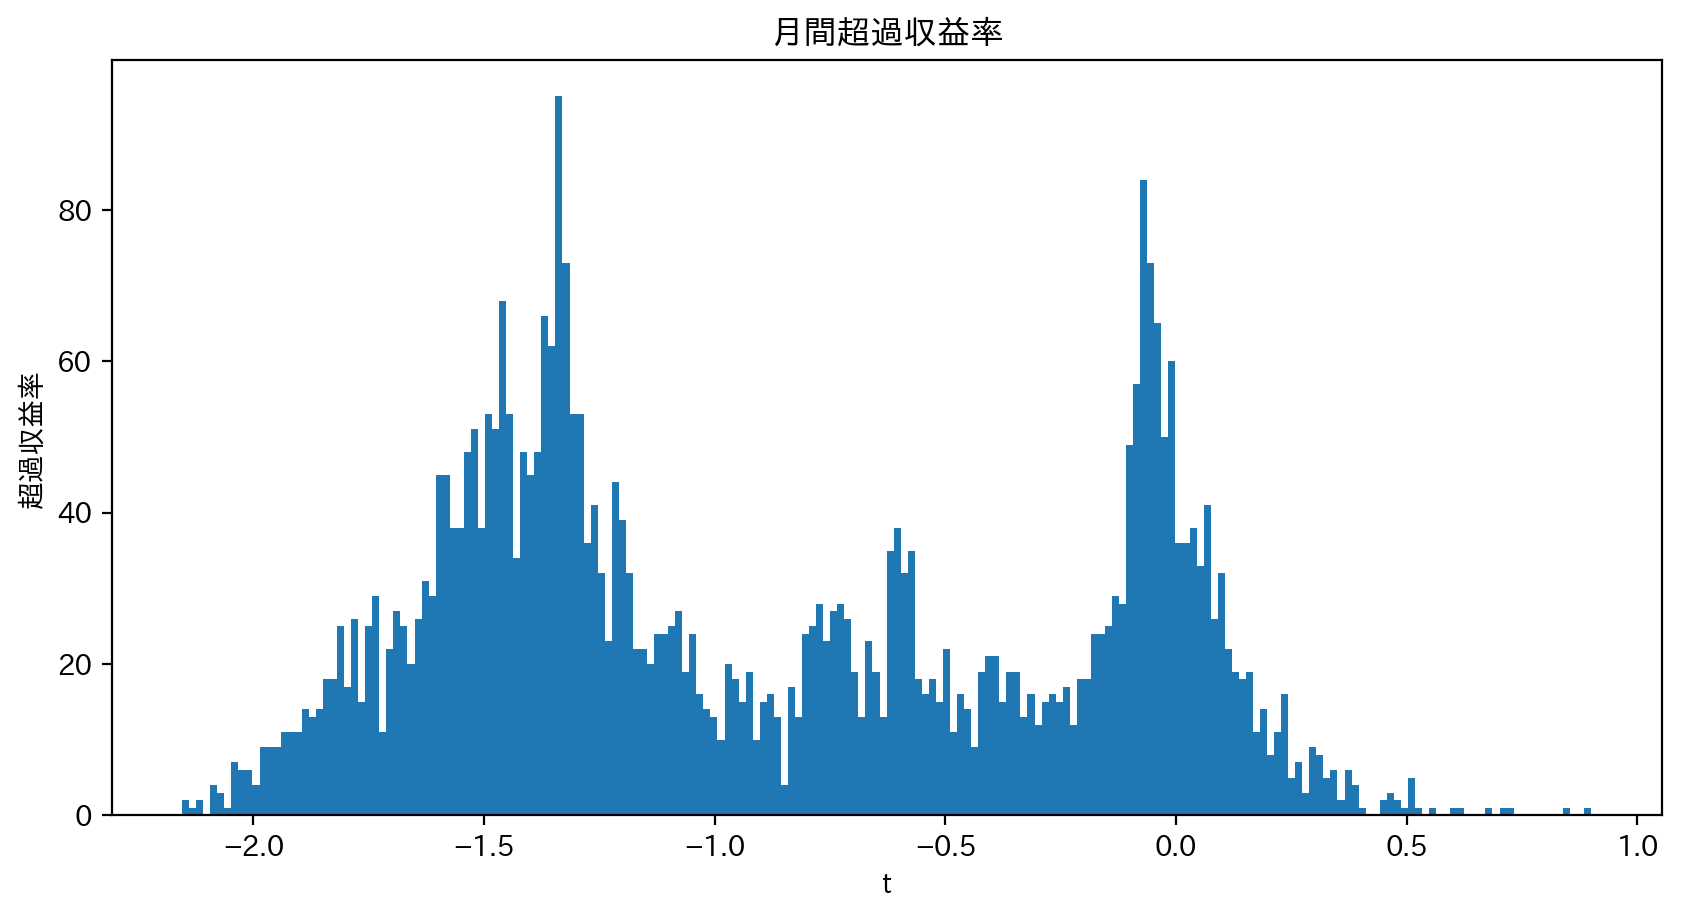

In [45]:
plt.figure(figsize=(10,5),dpi=200)
plt.title(f"月間超過収益率")
plt.hist(x, bins=200)
plt.xlabel('t')
plt.ylabel(r'超過収益率')
plt.savefig("excess_return_hist.png")

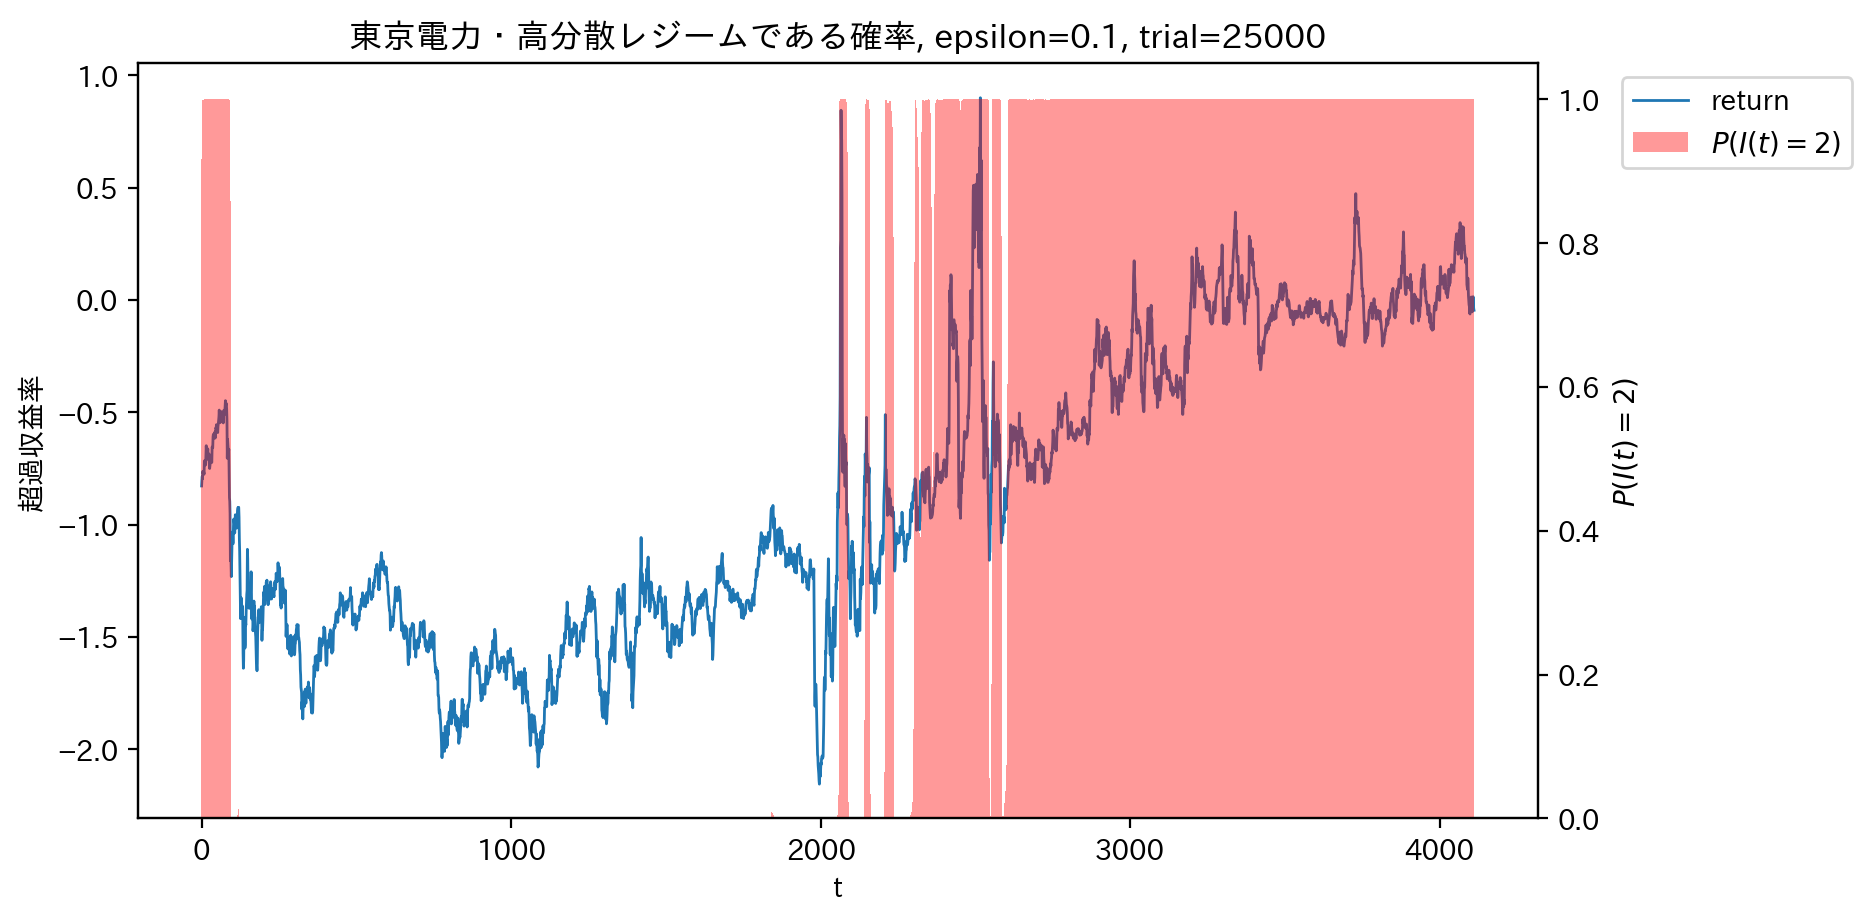

In [46]:
fig = plt.figure(figsize=(10,5),dpi=200)
ax1 = fig.add_subplot(111)
ln1=ax1.plot(range(length), x, linewidth = 1.0, label="return")

ax2 = ax1.twinx()
ln2=ax2.bar(range(length), prob2, width=1.0, color="red", alpha=0.4, label=r"$P(I(t) = 2)$")

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, bbox_to_anchor=(1.05, 1), loc='upper left')

ax1.set_xlabel('t')
ax1.set_ylabel(r'超過収益率')
ax2.set_ylabel(r'$P(I(t) = 2)$')
ax1.set_title(f"東京電力・高分散レジームである確率, epsilon={epsilon}, trial={trial}")

plt.subplots_adjust(left = 0.1, right = 0.8)
plt.savefig("probability_regime2.png")
plt.show()

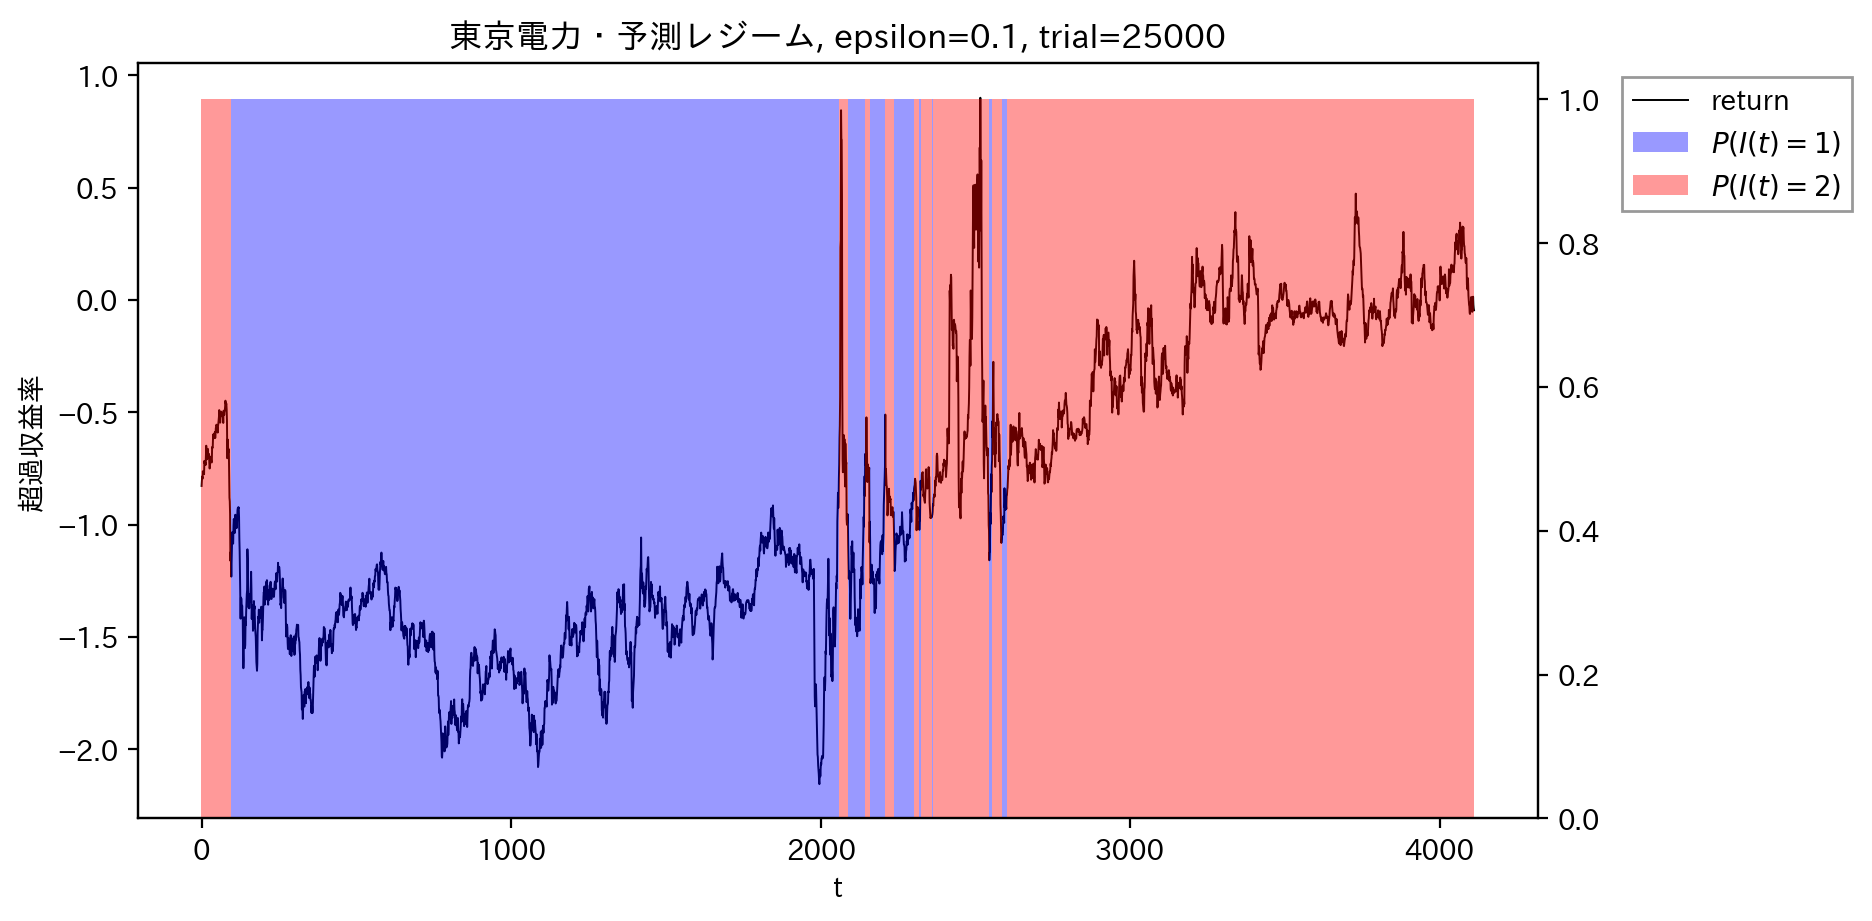

In [47]:
regime = np.array(prob2)>=0.5
regime = regime.astype(int)

fig = plt.figure(figsize=(10,5),dpi=200)
ax1 = fig.add_subplot(111)
ln1=ax1.plot(range(length), x, linewidth=0.7, color="black", label="return")

ax2 = ax1.twinx()
ln2=ax2.bar(range(length), 1-np.array(regime), width=1.0, color="blue", alpha=0.4, label=r"$P(I(t) = 1)$")
ln2=ax2.bar(range(length), regime, width=1.0, color="red", alpha=0.4, label=r"$P(I(t) = 2)$")

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, bbox_to_anchor=(1.05, 1), loc='upper left', edgecolor="gray", fancybox=False)

ax1.set_xlabel('t')
ax1.set_ylabel(r'超過収益率')
ax1.set_title(f"東京電力・予測レジーム, epsilon={epsilon}, trial={trial}")

plt.subplots_adjust(left = 0.1, right = 0.8)
plt.savefig("estimated_regime_with_return.png")
plt.show()

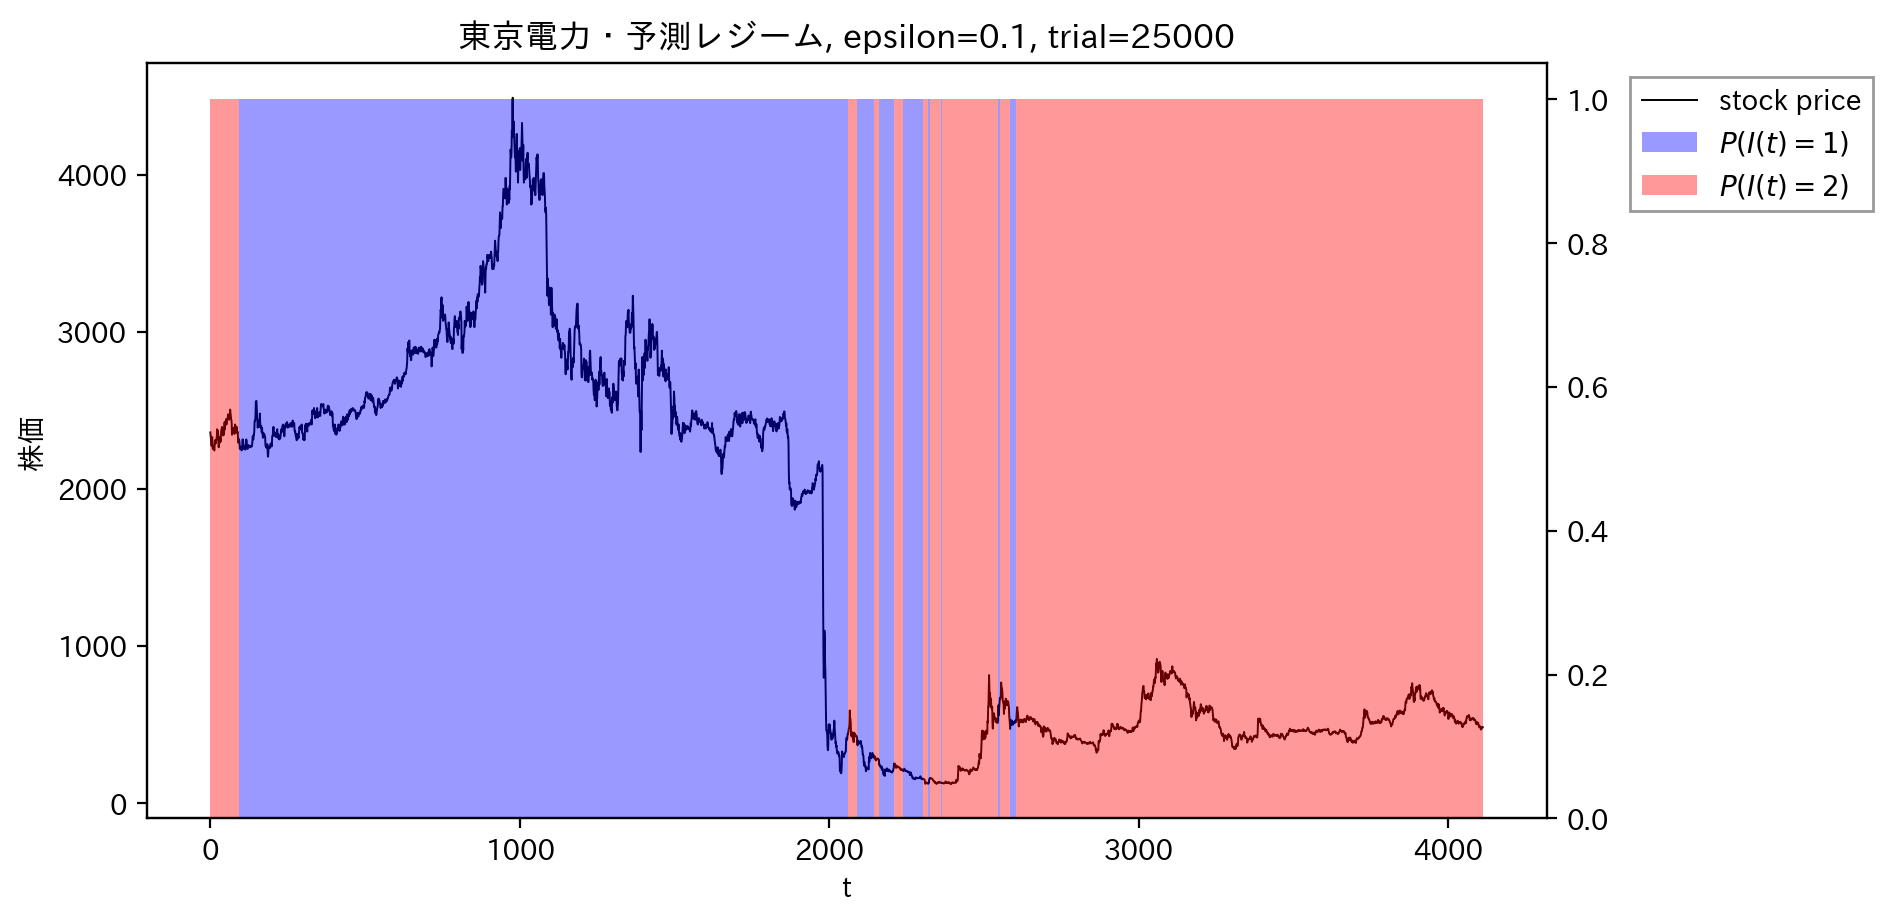

In [48]:
regime = np.array(prob2)>=0.5
regime = regime.astype(int)

fig = plt.figure(figsize=(10,5),dpi=200)
ax1 = fig.add_subplot(111)
ln1=ax1.plot(range(length), df["終値調整値"][30:], linewidth=0.7, color="black", label="stock price")

ax2 = ax1.twinx()
ln2=ax2.bar(range(length), 1-np.array(regime), width=1.0, color="blue", alpha=0.4, label=r"$P(I(t) = 1)$")
ln2=ax2.bar(range(length), regime, width=1.0, color="red", alpha=0.4, label=r"$P(I(t) = 2)$")

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, bbox_to_anchor=(1.05, 1), loc='upper left', edgecolor="gray", fancybox=False)

ax1.set_xlabel('t')
ax1.set_ylabel(r'株価')
ax1.set_title(f"東京電力・予測レジーム, epsilon={epsilon}, trial={trial}")

plt.subplots_adjust(left = 0.1, right = 0.8)
plt.savefig("estimated_regime_with_price.png")
plt.show()

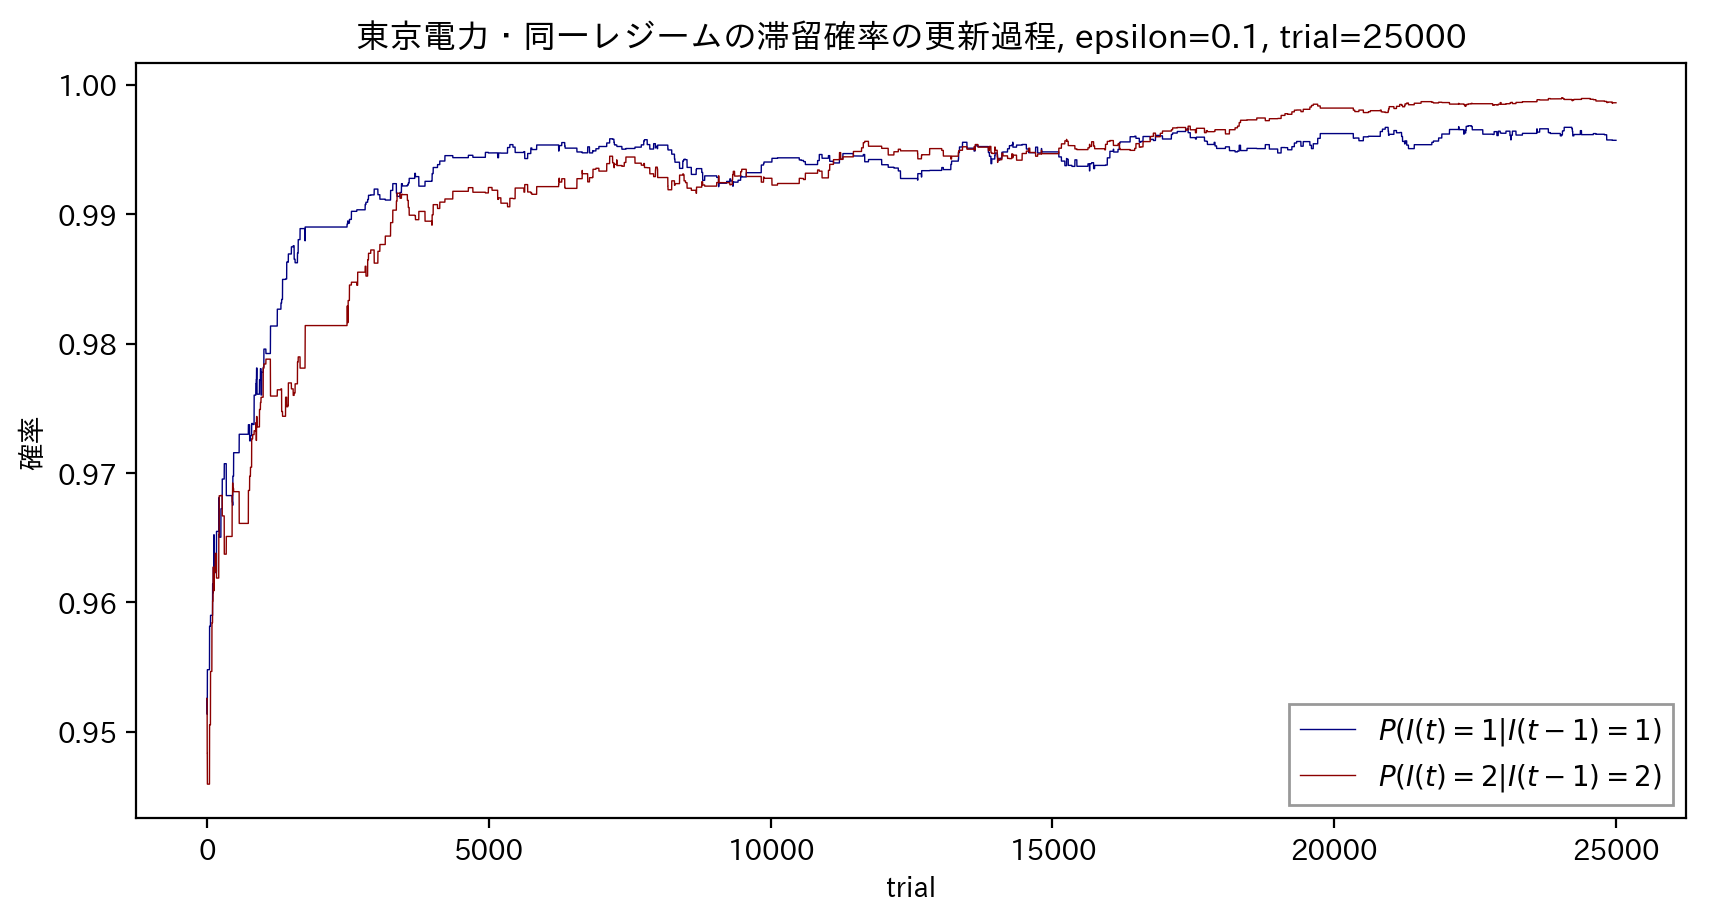

In [49]:
fig = plt.figure(figsize=(10,5),dpi=200)
ax1 = fig.add_subplot(111)
ax1.plot(theta_list[:,6], linewidth=0.5, color="navy", label=r"$P(I(t) = 1 | I(t-1) = 1)$")
ax1.plot(theta_list[:,7], linewidth=0.5, color="darkred", label=r"$P(I(t) = 2 | I(t-1) = 2)$")
ax1.legend(edgecolor="gray", fancybox=False)
ax1.set_title(f"東京電力・同一レジームの滞留確率の更新過程, epsilon={epsilon}, trial={trial}")
ax1.set_xlabel('trial')
ax1.set_ylabel(r'確率')

plt.savefig("updating_probability.png")
plt.show()

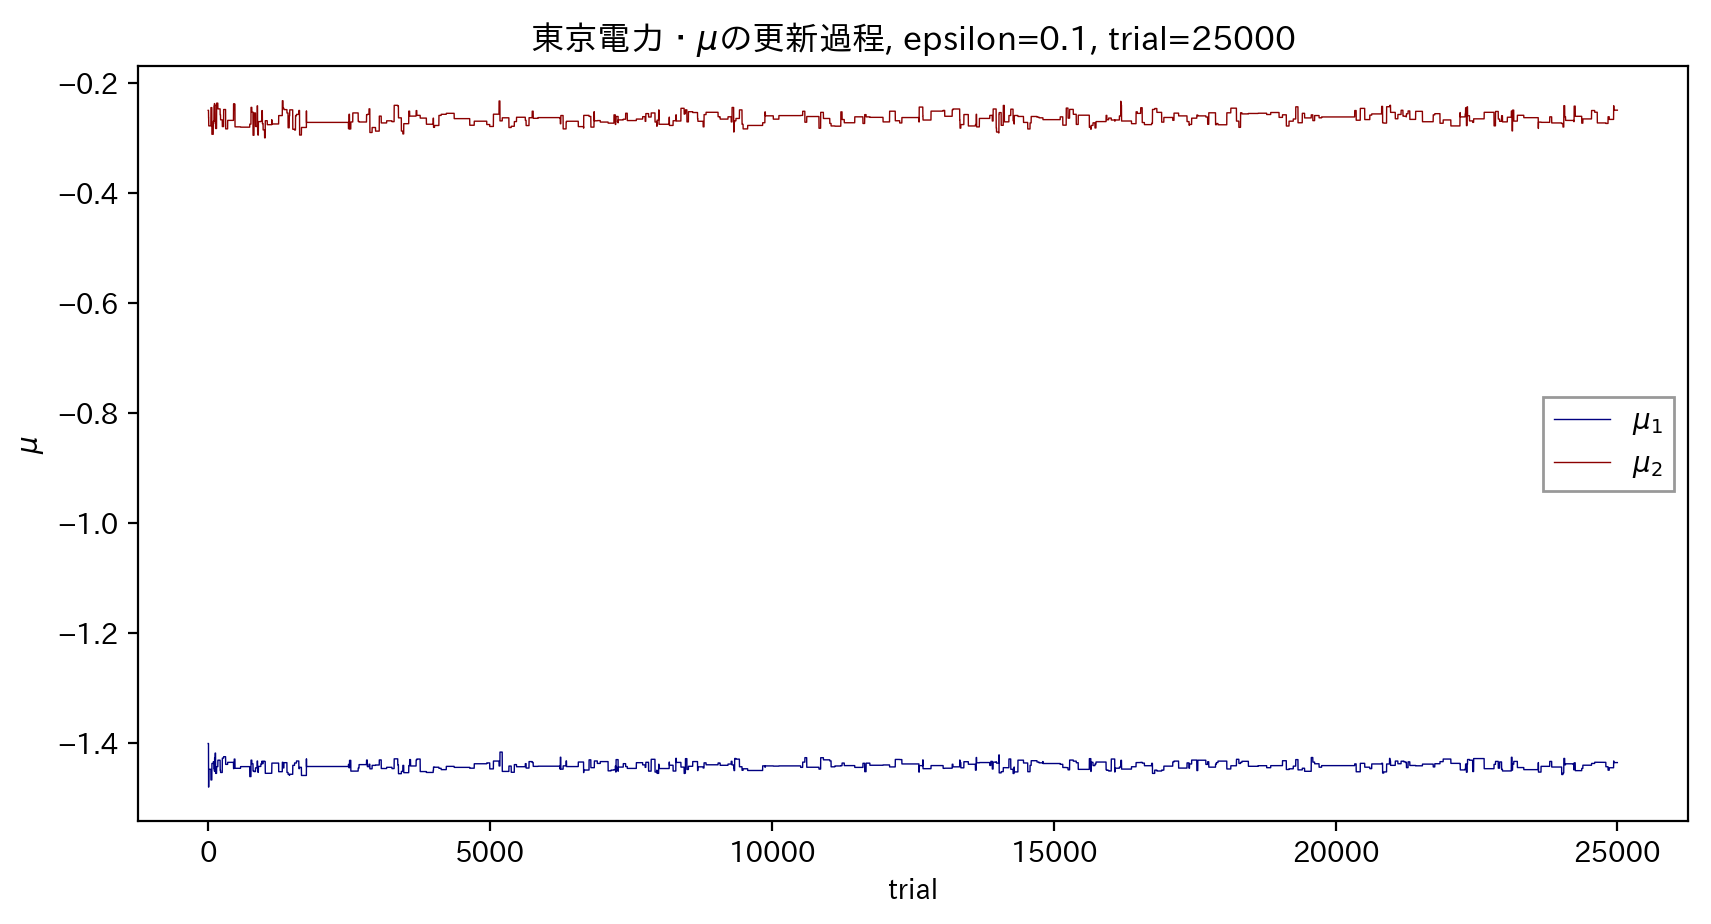

In [50]:
fig = plt.figure(figsize=(10,5),dpi=200)
ax1 = fig.add_subplot(111)
ax1.plot(theta_list[:,0], linewidth=0.5, color="navy", label=r"$\mu_1$")
ax1.plot(theta_list[:,1], linewidth=0.5, color="darkred", label=r"$\mu_2$")
ax1.legend(edgecolor="gray", fancybox=False)
ax1.set_title(f"東京電力・$\mu$の更新過程, epsilon={epsilon}, trial={trial}")
ax1.set_xlabel('trial')
ax1.set_ylabel(r'$\mu$')

plt.savefig("updating_mu.png")
plt.show()

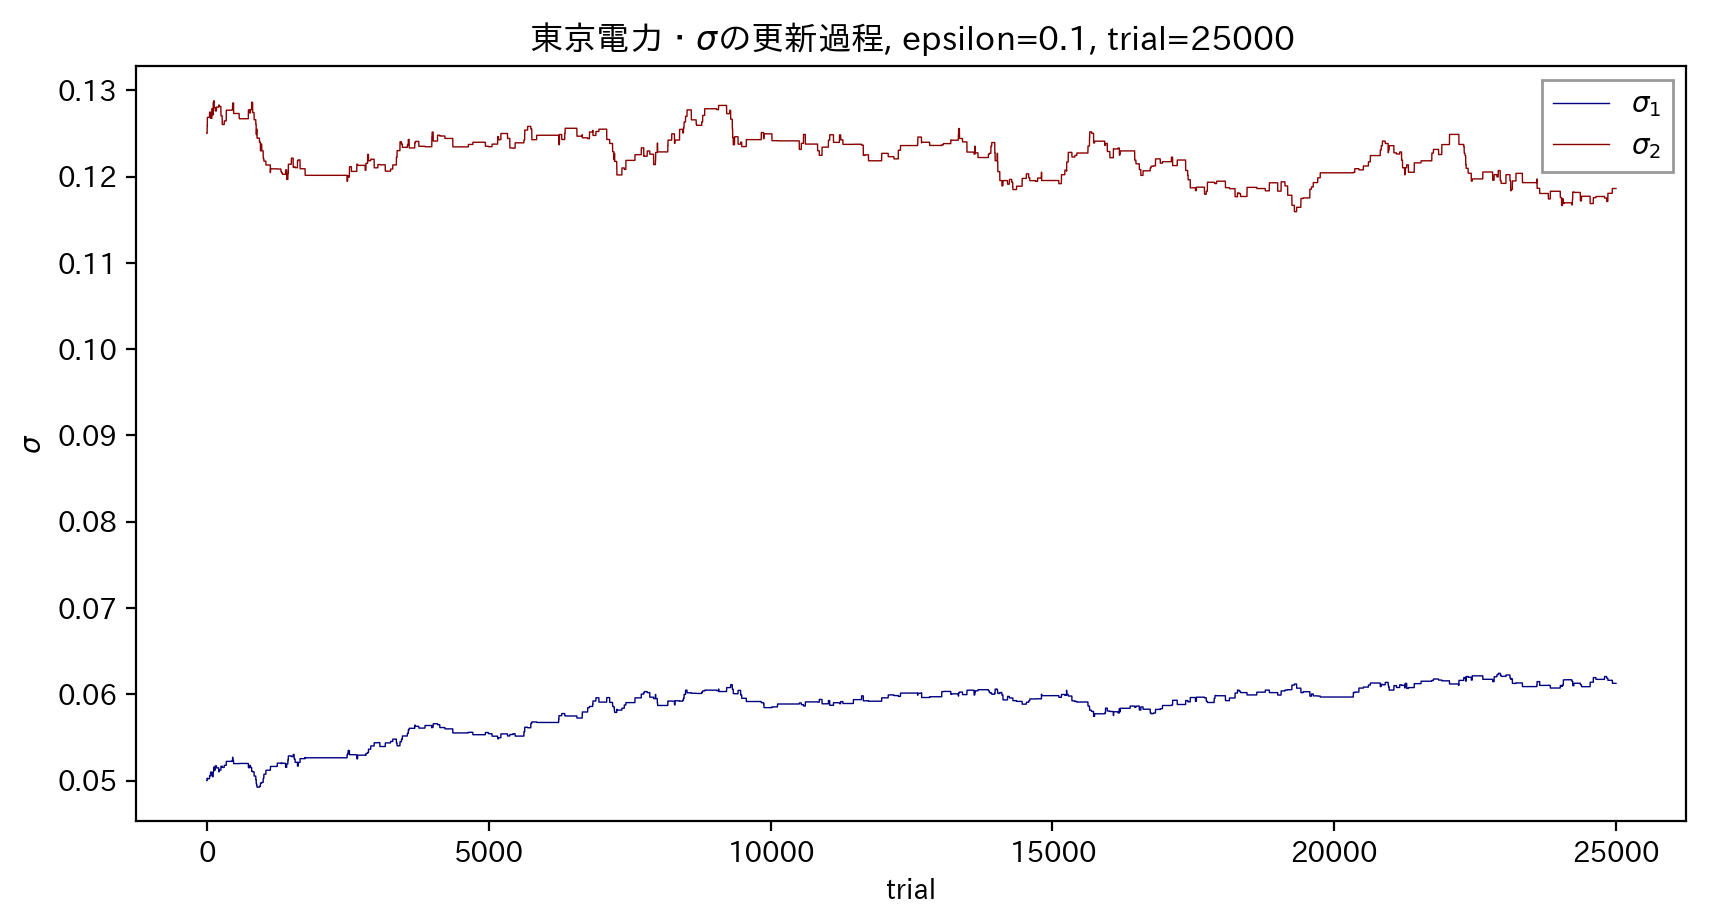

In [51]:
fig = plt.figure(figsize=(10,5),dpi=200)
ax1 = fig.add_subplot(111)
ax1.plot(theta_list[:,2], linewidth=0.5, color="navy", label=r"$\sigma_1$")
ax1.plot(theta_list[:,3], linewidth=0.5, color="darkred", label=r"$\sigma_2$")
ax1.legend(edgecolor="gray", fancybox=False)
ax1.set_title(f"東京電力・$\sigma$の更新過程, epsilon={epsilon}, trial={trial}")
ax1.set_xlabel('trial')
ax1.set_ylabel(r'$\sigma$')

plt.savefig("updating_sigma.png")
plt.show()

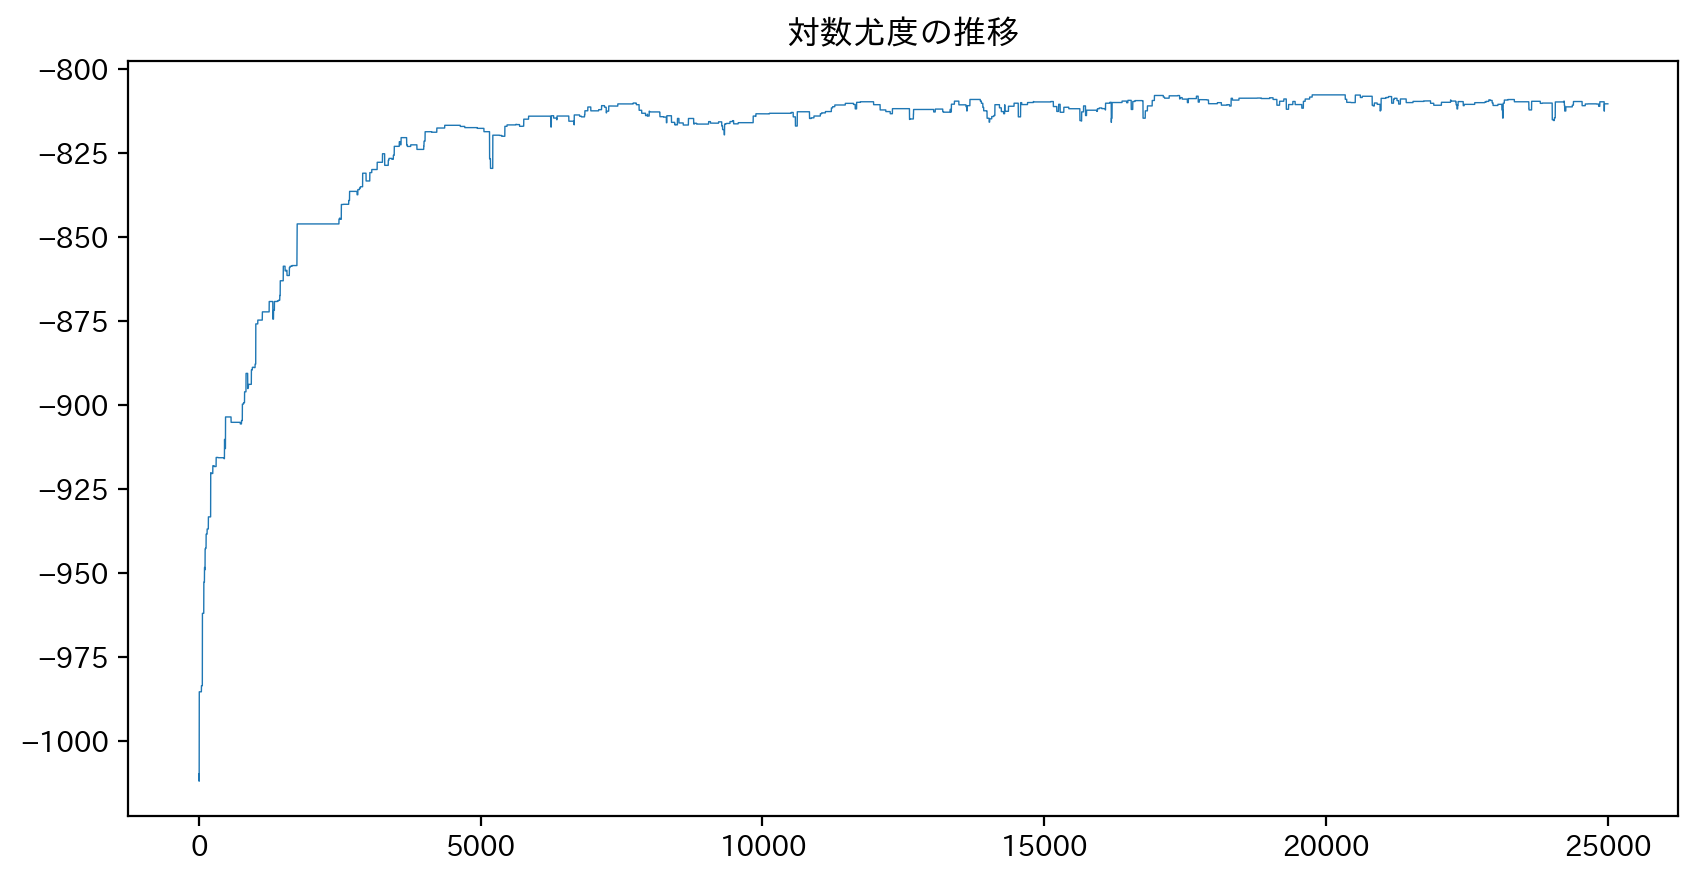

In [57]:
fig = plt.figure(figsize=(10,5),dpi=200)
ax1 = fig.add_subplot(111)
ax1.plot(logL_list, linewidth=0.5)
ax1.set_title(f"対数尤度の推移")
plt.savefig("likelihood.png")
plt.show()

# 推定レジームを分布に当てはめる

In [60]:
from scipy.stats import norm

X = np.arange(-3,1,0.01)
norm1 = norm.pdf(X,theta_list[-1][0],np.sqrt(theta_list[-1][2]))
norm2 = norm.pdf(X,theta_list[-1][1],np.sqrt(theta_list[-1][3]))

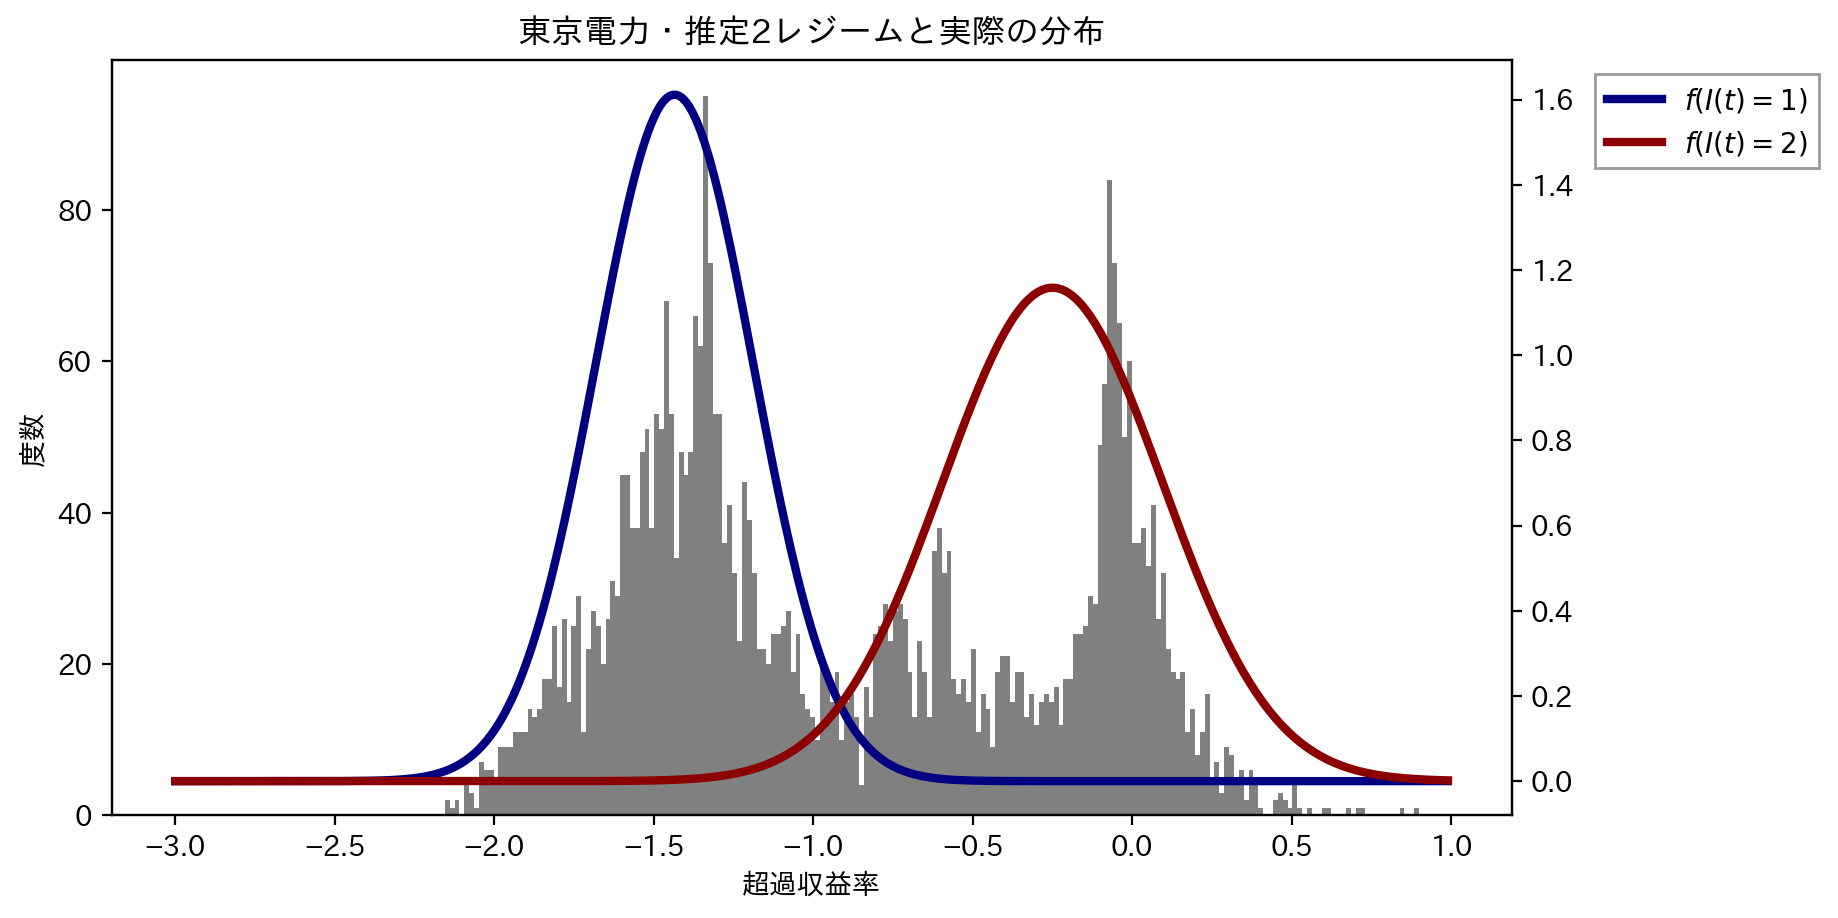

In [61]:
fig = plt.figure(figsize=(10,5),dpi=200)
ax1 = fig.add_subplot(111)
ln1=ax1.hist(x, bins=200, color="gray", label="stock price")

ax2 = ax1.twinx()
ln2=ax2.plot(X, norm1, color="navy", linewidth=3, label=r"$f(I(t) = 1)$")
ln2=ax2.plot(X, norm2, color="darkred", linewidth=3,label=r"$f(I(t) = 2)$")

h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h2, l2, bbox_to_anchor=(1.05, 1), loc='upper left', edgecolor="gray", fancybox=False)

ax1.set_xlabel('超過収益率')
ax1.set_ylabel(r'度数')
ax1.set_title(f"東京電力・推定2レジームと実際の分布")

plt.subplots_adjust(left = 0.1, right = 0.8)
plt.savefig("distribution_and_pdf.png")
plt.show()